In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lenstronomy.LensModel.lens_model import LensModel
from lenstronomy.LensModel.Solver.lens_equation_solver import LensEquationSolver
from lenstronomy.LensModel.Solver.epl_shear_solver import caustics_epl_shear

# For sampling from caustic
from shapely.geometry import Polygon
import pointpats

/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [61]:
from scipy.stats import norm
norm.rvs(size=10, scale=0.05)

array([-0.0031545 ,  0.01176327,  0.02111859, -0.07059713, -0.03008081,
       -0.07856345, -0.00536313, -0.04200044, -0.04132309, -0.03223049])

In [65]:
lens_model_list = ['EPL_NUMBA', 'SHEAR']
lensModel = LensModel(lens_model_list=lens_model_list)

kwargs_lens = [
    {
        "theta_E": 1.,
        "e1": 0.1,
        "e2": 0.1,
        "gamma": 2.2,
        "center_x": 0.0,
        "center_y": 0.0,
    },
    {
        "gamma1": -0.1,
        "gamma2": 0.1,
        "ra_0": 0,
        "dec_0": 0,
    },
]

In [66]:
caustic_double_points = caustics_epl_shear(
            kwargs_lens, return_which="double", num_th=500,maginf=-1000
        )
caustic_double = Polygon(caustic_double_points.T)

xy_source = pointpats.random.poisson(caustic_double, size=500).T
x_source, y_source = xy_source[0], xy_source[1]

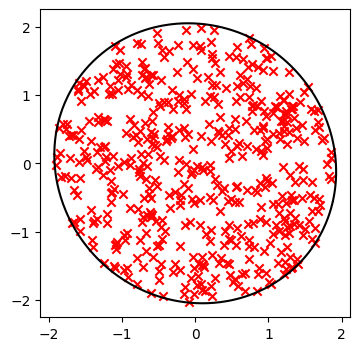

In [67]:
# plot
plt.figure(figsize=(4, 4))
plt.plot(caustic_double_points[0], caustic_double_points[1], "k")
plt.scatter(x_source, y_source, color="r", marker="x")
# plt.xlim(-1.5, 1.5)
# plt.ylim(-1.5, 1.5)
plt.show()

*  num_th is the resolution of the outer circle

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Assuming lens_eq_solver and kwargs_lens are defined elsewhere
# You may need to import or define them before running this code

# Function to update the plot based on slider values
def update_plot(x_source_val, y_source_val):
    (x0_image_position, x1_image_position) = lens_eq_solver.image_position_from_source(
        sourcePos_x=x_source_val,
        sourcePos_y=y_source_val,
        kwargs_lens=kwargs_lens,
        solver="analytical",
        precision_limit=1e-10, # this does not matter 
        magnification_limit=1.0 / 1000.0,
    )

    # Clear previous plot
    plt.clf()

    # Plot caustic and points
    plt.plot(caustic_double_points[0], caustic_double_points[1], "k")
    plt.scatter(x_source_val, y_source_val, color="r", marker="x")
    plt.scatter(x0_image_position, x1_image_position, color="b", marker="o")

    # Set plot limits
    plt.xlim(-2.0, 2.0)
    plt.ylim(-2.0, 2.0)
    plt.gcf().set_size_inches(8, 8)
    # Show updated plot
    plt.show()

# Initial values for sliders
initial_x_source = 0.5
initial_y_source = 0.8

# Create sliders
x_source_slider = FloatSlider(value=initial_x_source, min=-1.500, max=1.500, step=0.001, description='x_source', readout_format='.4f')
y_source_slider = FloatSlider(value=initial_y_source, min=-1.500, max=1.500, step=0.001, description='y_source', readout_format='.4f')

# Create interactive plot
interact(update_plot, x_source_val=x_source_slider, y_source_val=y_source_slider)


interactive(children=(FloatSlider(value=0.5, description='x_source', max=1.5, min=-1.5, readout_format='.4f', …

<function __main__.update_plot(x_source_val, y_source_val)>